### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент: Миронов Д.А.
##### Группа:   НПИ-02-21

## Москва 2024
***

### Вариант №25



1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик). Оставьте в наборе признаки, принимающие числовые значения.  

Загружаем набор данных forest_fires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

ds= tfds.load("forest_fires", split='train')
df = tfds.as_dataframe(ds)
df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/517 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/forest_fires/0.0.1.incompleteR6CKHY/forest_fires-train.tfrecord*...:   0%|…

Dataset forest_fires downloaded and prepared to /root/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,0.0,26.400000,4.5


В наборе данных используются только числовые значения, поэтому оставляем всё без изменений

2.	Удалите из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных. Визуализируйте точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.  

Количество оставленных точек: 460
Количество удаленных точек: 57
Процент удаленных точек: 11.02514506769826


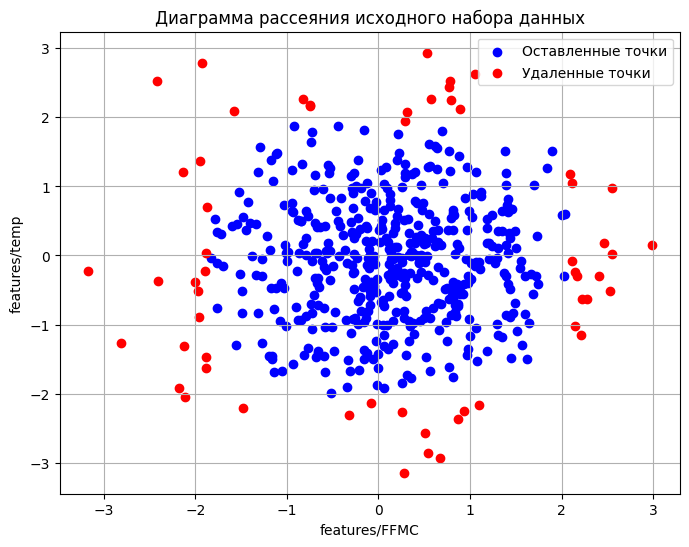

In [3]:
import numpy as np
import matplotlib.pyplot as plt

FFMC = df['features/FFMC']
temp = df['features/temp']

size_ds = FFMC.size + temp.size
x_out = np.random.normal(size=(size_ds // 2, 2))

z_score = 2

mean = np.mean(x_out, axis=0)
std_dev = np.std(x_out, axis=0)
z_scores = np.abs((x_out - mean) / std_dev)

outliers_index = np.any(z_scores > z_score, axis=1)
remaining_points = x_out[~outliers_index]
removed_points = x_out[outliers_index]

print(f"Количество оставленных точек: {remaining_points.shape[0]}")
print(f"Количество удаленных точек: {removed_points.shape[0]}")
print(f"Процент удаленных точек: {removed_points.shape[0] * 100 / x_out.shape[0]}")

plt.figure(figsize=(8, 6))
plt.scatter(remaining_points[:, 0], remaining_points[:, 1], color='blue', label='Оставленные точки')
plt.scatter(removed_points[:, 0], removed_points[:, 1], color='red', label='Удаленные точки')
plt.xlabel('features/FFMC')
plt.ylabel('features/temp')
plt.title('Диаграмма рассеяния исходного набора данных')
plt.legend()
plt.grid(True)
plt.show()



3.	Выполните стандартизацию независимого признака и масштабирование на интервал [-1, 1] зависимого признака. Решите задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании. Отследите обучение нейронных сетей, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Стадартизация независимого признака features/FFMC и маштабирование зависимого признака features/temp

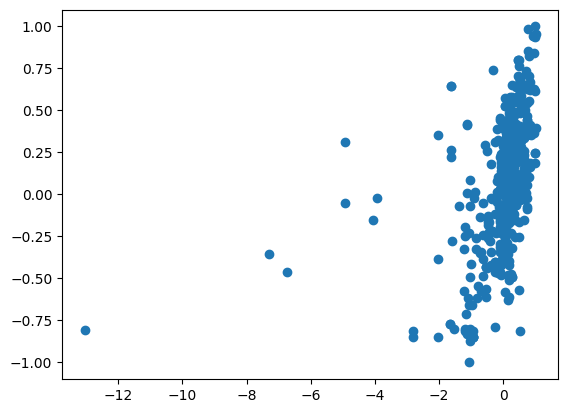

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Выбор независимого и зависимого признаков
X = df[['features/FFMC']]
y = df[['features/temp']]

# Стандартизация независимого признака
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Масштабирование зависимого признака
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y_scaled = scaler_y.fit_transform(y)

# Преобразование в DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=y.columns)

# Вывод стандартизированного и масштабированного датасета
plt.scatter(X_scaled_df,y_scaled_df)

Решаем задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оцените качество полученных моделей по показателю, указанному в индивидуальном задании.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели нейронной сети для линейной регрессии
model_linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Компиляция модели
model_linear.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# Обучение модели
history_Lin = model_linear.fit(
    X_train_scaled, y_train,
    epochs=300,
    verbose=1,
    validation_split = 0.3)

# Оценка качества модели на тестовых данных
linear_predictions = model_linear.predict(X_test_scaled)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions.flatten()))
print("RMSE линейной регрессии:", linear_rmse)

# Создание модели нейронной сети для полиномиальной регрессии
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Создание модели нейронной сети для полиномиальной регрессии
model_poly = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[X_train_poly.shape[1]])
])


# Компиляция модели
model_poly.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

# Обучение модели
history_poly = model_poly.fit(
    X_train_poly, y_train,
    epochs=300,
    verbose=1,
    validation_split = 0.3 )

# Оценка качества модели на тестовых данных
poly_predictions = model_poly.predict(X_test_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_predictions.flatten()))
print("RMSE полиномиальной регрессии степени 3:", poly_rmse)

Epoch 1/300
10/10 [==============================] - 1s 69ms/step - loss: 375.0108 - val_loss: 348.3201
Epoch 2/300
10/10 [==============================] - 0s 20ms/step - loss: 336.4358 - val_loss: 310.6964
Epoch 3/300
10/10 [==============================] - 0s 14ms/step - loss: 301.1749 - val_loss: 277.0745
Epoch 4/300
10/10 [==============================] - 0s 20ms/step - loss: 269.3745 - val_loss: 246.9974
Epoch 5/300
10/10 [==============================] - 0s 18ms/step - loss: 241.3337 - val_loss: 220.1484
Epoch 6/300
10/10 [==============================] - 0s 11ms/step - loss: 215.8849 - val_loss: 195.8623
Epoch 7/300
10/10 [==============================] - 0s 19ms/step - loss: 192.7886 - val_loss: 174.5301
Epoch 8/300
10/10 [==============================] - 0s 29ms/step - loss: 172.1854 - val_loss: 155.1914
Epoch 9/300
10/10 [==============================] - 0s 24ms/step - loss: 153.0495 - val_loss: 137.6178
Epoch 10/300
10/10 [==============================] - 0s 27ms/st

Из полученных данных можно сделать вывод, что обе нейронные сети обучаются

4.	Постройте кривые обучения для построенных нейронных сетей с зависимостью от количества эпох на одной визуализации. На визуализации создайте легенду.

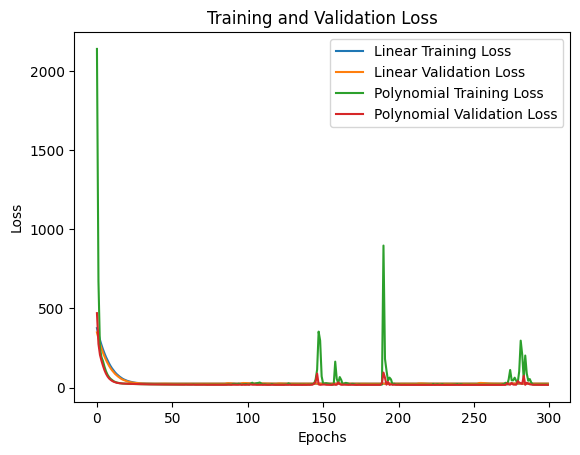

In [13]:
plt.plot(history_Lin.history['loss'], label='Linear Training Loss')
plt.plot(history_Lin.history['val_loss'], label='Linear Validation Loss')
plt.plot(history_poly.history['loss'], label='Polynomial Training Loss')
plt.plot(history_poly.history['val_loss'], label='Polynomial Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5.	Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.  

13/13 [==============================] - 0s 1ms/step


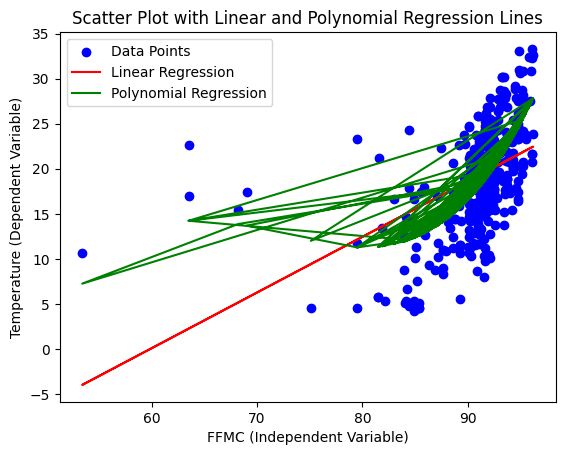

In [12]:
# Визуализация точек набора данных
plt.scatter(X_train, y_train, color='blue', label='Data Points')

# Визуализация линейной регрессии
plt.plot(X_train, model_linear.predict(X_train_scaled), color='red', label='Linear Regression')

# Визуализация полиномиальной регрессии
plt.plot(X_train, model_poly.predict(X_train_poly), color='green', label='Polynomial Regression')

plt.title('Scatter Plot with Linear and Polynomial Regression Lines')
plt.xlabel('FFMC (Independent Variable)')
plt.ylabel('Temperature (Dependent Variable)')
plt.legend()
plt.show()


6.	Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.  

In [14]:
correlation = df.corr()['features/FFMC'].drop(['features/FFMC', 'features/temp' ])

# Выбор признака с минимальной корреляцией
min_corr_feature = correlation.idxmin()
min_corr_value = correlation.min()
# Проверка типа данных выбранного признака
min_corr_feature_dtype = df[min_corr_feature].dtype
print("Список признаков с неприрывными значениями")
for feature in df.columns:
    if feature not in ['features/FFMC', 'features/temp']:  # Пропустить FFMC и temp
        if df[feature].dtype == 'float32' or df[feature].dtype == 'float64' :  # Проверить, является ли тип данных вещественным
            print(f'{feature} его корреляция {correlation[feature]}')
# Проверка, является ли тип данных вещественным (непрерывным)
if min_corr_feature_dtype == 'float32':
    print(f"Дополнительный признак '{min_corr_feature}' имеет минимальную корреляцию с 'features/FFMC' которая равна {min_corr_value}")
else:
    print("Дополнительный признак с минимальной корреляцией с FFMC, который принимает непрерывные значения:")
    found_continuous_feature = False
    for feature in df.columns:
        if feature not in ['features/FFMC', 'features/temp']:  # Пропустить FFMC и temp
            if df[feature].dtype == 'float32' or df[feature].dtype == 'float64' :  # Проверить, является ли тип данных вещественным
                print(feature)
                found_continuous_feature = True
                break  # Прервать цикл после нахождения первого признака с непрерывными значениями
    if not found_continuous_feature:
        print("Ни один из дополнительных признаков не принимает непрерывные значения")


Список признаков с неприрывными значениями
area его корреляция 0.04012201250910352
features/DC его корреляция 0.3305118239619061
features/DMC его корреляция 0.3826188177506962
features/ISI его корреляция 0.5318049842653427
features/RH его корреляция -0.30099544146297946
features/rain его корреляция 0.05670152490718101
features/wind его корреляция -0.028484796215840092
Дополнительный признак 'features/RH' имеет минимальную корреляцию с 'features/FFMC' которая равна -0.30099544146297946


Индивидуальное задание было такое:Доп. признак: имеющий минимальную корреляцию с независимой переменной

7.	Стандартизуйте этот признак и визуализируйте его в соответствии с индивидуальным заданием.  

Стандартизируем этот признак

In [15]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df[[min_corr_feature]])

Добавим визуализацию

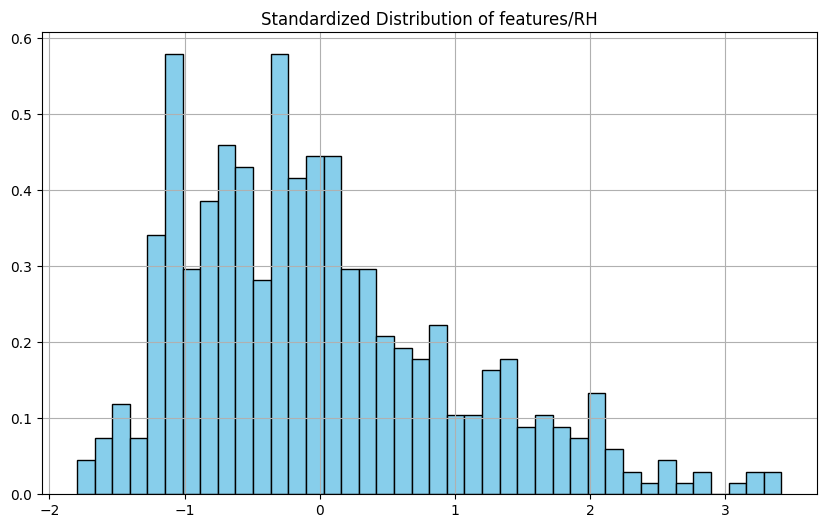

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(scaled_feature, bins=40, color='skyblue', edgecolor='black', density=True)
plt.title(f'Standardized Distribution of {min_corr_feature}')
plt.grid(True)

8.	Сформируйте набор входных данных из двух стандартизованных признаков набора данных (независимый признак и определенный признак), постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика. Отследите обучение нейронной сети, изменяя, при необходимости, гиперпараметры (функцию потерь, оптимизатор, шаг обучения и т.п.) или применяя регуляризацию.  

Индивидуальное задание: Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128, функция активации – relu.

In [17]:
rh = df['features/RH']
rh_s = (rh - np.mean(rh))/np.std(rh)
ffmc = df['features/FFMC']
ffmc_s = (ffmc - np.mean(ffmc))/np.std(ffmc)
ffmc_S = np.array(ffmc_s).reshape(-1,1)
rh_S = np.array(rh_s).reshape(-1,1)
all = np.hstack([ffmc_S,rh_S])
all.shape

(517, 2)

In [18]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(all)

In [19]:
nei_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
nei_model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.04),
  loss=tf.keras.losses.mean_squared_error)

history_nei = nei_model.fit(
    all,y_scaled,
    epochs=100,
    verbose=1,
    validation_split = 0.2

)


Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.8558 - val_loss: 0.2151
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2251 - val_loss: 0.1005
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0810 - val_loss: 0.0799
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0696 - val_loss: 0.0778
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0702 - val_loss: 0.0707
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0629 - val_loss: 0.0729
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0594 - val_loss: 0.0737
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0596 - val_loss: 0.0667
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0615 - val_loss: 0.0700
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0619 - val_loss: 0.0691
Epoch 11

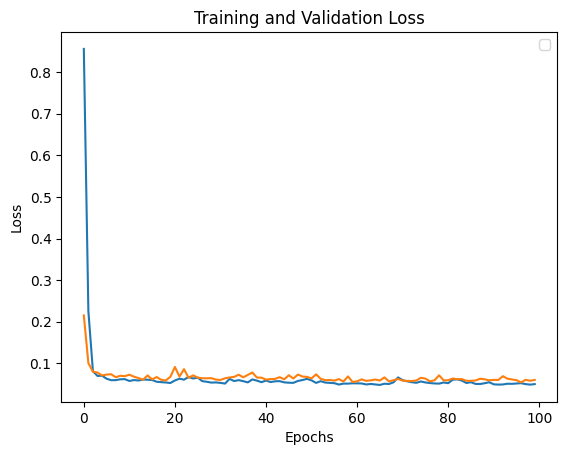

In [20]:
plt.plot(history_nei.history['loss'])
plt.plot(history_nei.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Проверка обучения сети с помощью R^2

In [21]:
from sklearn.metrics import r2_score
score = nei_model.predict(all)
r2_score(y_scaled,score)

17/17 [==============================] - 0s 2ms/step


0.6423827875683699

9. Визуализируйте набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

In [22]:
xs = all[:,0]
ys = all[:,1]
zs = y_scaled
xs.shape, ys.shape, zs.shape

((517,), (517,), (517, 1))

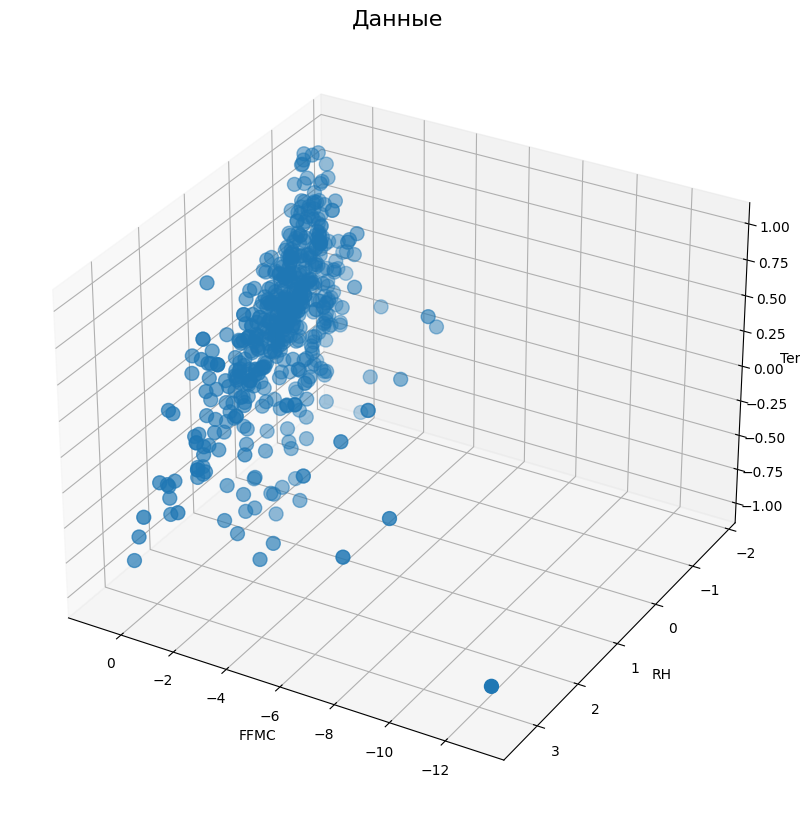

In [102]:
f = plt.figure(figsize=(10,12))
ax = plt.axes(projection='3d')
ax.set_title('Данные', fontsize=16)
ax.set_xlabel('FFMC')
ax.set_ylabel('RH')
ax.set_zlabel('Temp')
ax.scatter(xs,ys,zs, s = 100)
ax.view_init(azim=120, elev=30)

In [24]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

In [25]:
x_mesh,y_mesh = np.meshgrid(x_plot,y_plot)
x_mesh.shape,y_mesh.shape

((51, 51), (51, 51))

In [26]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

Прогнозируем при помощи обученной ранее модели, после чего вернемся к форме данных 51 на 51:

In [28]:
z = nei_model.predict(xy_2)
z.shape

82/82 [==============================] - 0s 5ms/step


(2601, 1)

In [29]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

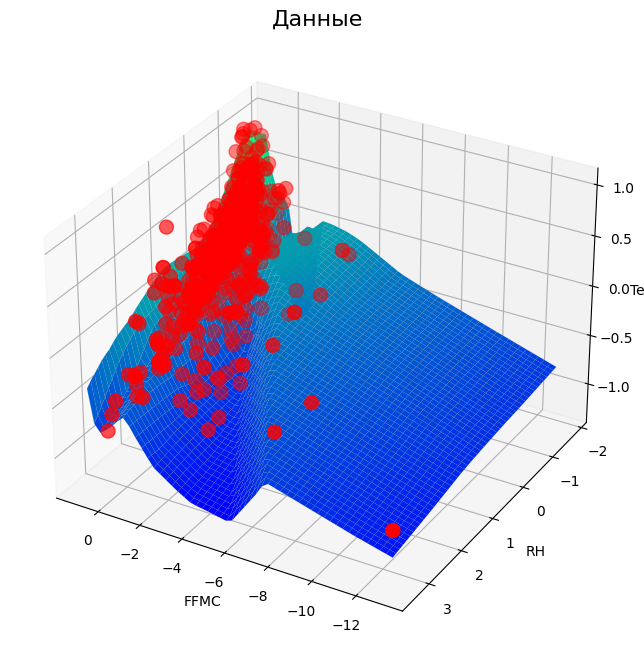

In [101]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray')
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_title('Данные', fontsize=16)
ax.set_xlabel('FFMC')
ax.set_ylabel('RH')
ax.set_zlabel('Temp')

ax.view_init(elev = 30, azim = 120)

Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

In [90]:
x_train, x_test, y_train, y_test = train_test_split(all, y_scaled, test_size = 0.17)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 2), (88, 2), (429, 1), (88, 1))

In [92]:
train_score = []
test_score = []
for i in range(9, 429, 10):
    large_model = tf.keras.Sequential([
      feature_normalizer,
      tf.keras.layers.Dense(units=32, activation='sigmoid'),
      tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mse')
    large_model.fit(x_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(x_train[:i])
    train_score.append(r2_score(y_train[:i], y_train_predict))

    y_test_predict = large_model.predict(x_test)
    test_score.append(r2_score(y_test, y_test_predict))
    print('-->', i, ' done')

3/3 [==============================] - 0s 4ms/step
--> 9  done
3/3 [==============================] - 0s 4ms/step
--> 19  done
3/3 [==============================] - 0s 4ms/step
--> 29  done
3/3 [==============================] - 0s 4ms/step
--> 39  done
3/3 [==============================] - 0s 4ms/step
--> 49  done
3/3 [==============================] - 0s 4ms/step
--> 59  done
3/3 [==============================] - 0s 5ms/step
--> 69  done
3/3 [==============================] - 0s 4ms/step
--> 79  done
3/3 [==============================] - 0s 4ms/step
--> 89  done
3/3 [==============================] - 0s 4ms/step
--> 99  done
3/3 [==============================] - 0s 4ms/step
--> 109  done
3/3 [==============================] - 0s 3ms/step
--> 119  done
3/3 [==============================] - 0s 4ms/step
--> 129  done
3/3 [==============================] - 0s 4ms/step
--> 139  done
3/3 [==============================] - 0s 3ms/step
--> 149  done
3/3 [==============================]

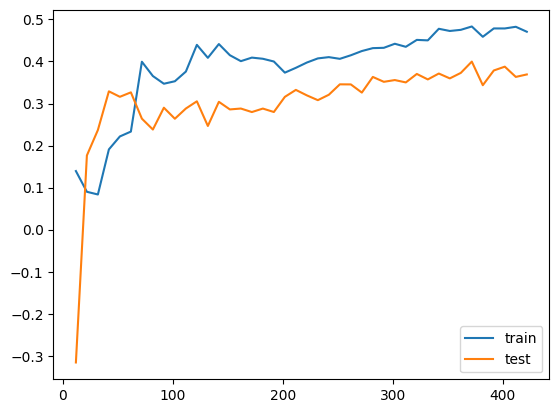

In [100]:
plt.plot([i for i in range(12, len(x_train)+1, 10)],
                               train_score, label="train")
plt.plot([i for i in range(12, len(x_train)+1, 10)],
                               test_score, label="test")
plt.legend();